<a href="https://colab.research.google.com/github/Davido-star/analyzing-flight-paths1/blob/main/flight_paths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
David Smith 
Python3
Analyzing flight Paths from a csv file 
"""


In [ ]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()


Saving Camp_stats.csv to Camp_stats.csv


In [ ]:
#bring in the data from the csv
import csv
f=open("Camp_stats.csv")
for row in csv.reader(f):
    print(row)

['Refugee_Camp_Name', 'Country', 'Population_2006', 'Population_2014']
['Kakuma', 'Kenya', '90457', '153959']
['Hagadera', 'Kenya', '59185', '106968']
['Adjumani', 'Uganda', '54051', '96926']
['Dagahaley', 'Kenya', '39526', '88486']
['Zaatari', 'Jordan', '0', '84773']


In [ ]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

Saving airports.dat to airports.dat


In [49]:
#Challenge 1 Print names of every airport in The Gambia
import csv
f = open("airports.dat")
for row in csv.reader(f):
  if row[3] == "Gambia":
    print(row[1])


Banjul International Airport


In [50]:
#challenge 2 reading the airport database 
latitudes = {} #define new dictionarys for latitudes and longitudes 
longitudes = {}
#import database 
f = open("airports.dat")
for row in csv.reader(f):
  airport_id = row[0] #define the airport id for iteration
  latitudes[airport_id] = float(row[6])#latitudes in airports.dat are in row 6 
  longitudes[airport_id] = float(row[7])#longitudes in airports.dat are n row 


In [27]:
"""
Challenge 3 route distances 
"""
# Copy of geo_distance.py
# Using the Haversine formula for geographic Great Circle Distance
# As per https://en.wikipedia.org/wiki/Haversine_formula

from math import cos,radians,sin,pow,asin,sqrt

def distance(lat1, long1, lat2, long2):
  radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius
  # Lat,long are in degrees but we need radians
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  long1 = radians(long1)
  long2 = radians(long2)

  dlat = lat2-lat1
  dlon = long2-long1

  a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
  distance = 2 * radius * asin(sqrt(a))

  return distance

In [30]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

Saving routes.dat to routes.dat


In [37]:
#import the routes.dat file 
import csv
distances=[] #define a list to hold our distances later on 
f = open("routes.dat")
for row in csv.reader(f):
  #define our source and destinations for distance calculations 
  source_airport= row[3]
  destination_airport=row[5]
  if source_airport in latitudes and destination_airport in latitudes: #some airports in the airports.dat file are not in the routes file and we want only the airports that are in the routes file to have calculations run 
    #define the source latitudes longitudes from the previously defined dictionary 
    source_latitudes=latitudes[source_airport]
    source_longitude=longitudes[source_airport]
    #define the destination latitudes longitudes from the previously defined dictionary 
    destination_latitudes=latitudes[destination_airport]
    destination_longitudes=longitudes[destination_airport]
    #appened the sources and destinations to our distances list 
    distances.append(distance(source_latitudes,source_longitude,destination_latitudes,destination_longitudes))
    
distances

[1506.825604458928,
 1040.4383197669074,
 448.164908709546,
 770.5085001497805,
 1338.6314665862067,
 715.6493504840489,
 892.3827877543458,
 951.4321982829719,
 1171.8814952837668,
 1008.2531100895807,
 1685.4265243719858,
 1171.8814952837668,
 1506.825604458928,
 1040.4383197669074,
 770.5085001497805,
 715.6493504840489,
 1008.2531100895807,
 1216.8445674824818,
 723.523203520023,
 1216.8445674824818,
 1372.8864143629512,
 1464.056935072568,
 448.164908709546,
 892.3827877543458,
 1685.4265243719858,
 1372.8864143629512,
 554.703359662419,
 1012.6027135761158,
 1557.1718220176435,
 1324.6117527543267,
 1338.6314665862067,
 1370.297258632382,
 723.523203520023,
 554.703359662419,
 1012.6027135761158,
 1324.6117527543267,
 1370.297258632382,
 951.4321982829719,
 1464.056935072568,
 1557.1718220176435,
 488.33962159397527,
 1199.3591559200308,
 1338.6314665862067,
 608.6430610264199,
 488.33962159397527,
 608.6430610264199,
 882.1865409507233,
 1458.824309959064,
 517.4862726798776,
 1

Text(0, 0.5, 'number of flights')

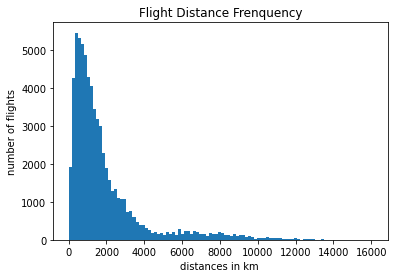

In [45]:
#functions to define and display a histogram 
import numpy as np
import matplotlib.pyplot as plt

plt.hist(distances,100) #we want to plot distances on the x axis and number of flights on the y 
#add graph label titles 
plt.title("Flight Distance Frenquency")
plt.xlabel("distances in km ")
plt.ylabel("number of flights")